In [9]:
import torch
import torchvision

import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
import xarray as xr


## Epoch testing code

The number of epochs required to train autoencoder models will be verified in this notebook. This requires a set dataset with a specific excluded validation set, and a specific model. Performance will be evaluated by training the model over 100 , 1000, 10000, and 20000 epochs to determine when overfitting happens (validation score >> train score). In addition, model performance also needs to be evaluated by examining the predicted profiles. 

In [10]:
# load datasets
data_dir = Path('/Users/jarl/2d-discharge-nn/data/image_datasets')
data_list = sorted(data_dir.rglob('*.npz'))

In [11]:
def plot_data(data):
    fig, ax = plt.subplots(ncols=5, sharey=True)
    for i in range(5):
        ax[i].imshow(data[i, :, :], origin='lower')

In [12]:
def get_dataset(V, P):
    """Function to load data from a pair of V, P

    This is surprisingly easier than using netCDFs lmao.

    Args:
        V (int or float): voltage
        P (int or float): pressure

    Returns:
        np.array: Array with shape (5, 707, 200)
    """
    V = str(float(V))
    P = str(float(P))
    file = next(data_dir.glob(f'{V}_{P}.npz'))
    array = np.load(file)['arr_0']

    return array

In [13]:
test = get_dataset(300, 60)

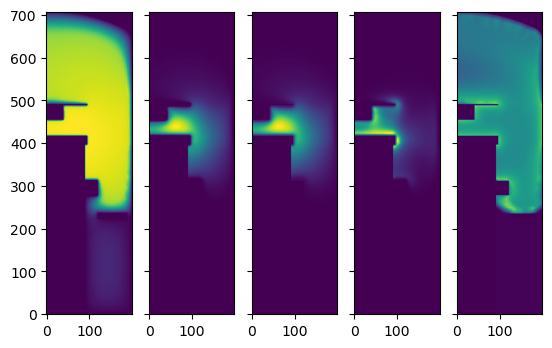

In [14]:
plot_data(test)

### To do:
* downscale images
* scale for each variable
* set up training loop function
* train, test, validation split
* plot train and validation error (I can probably just use the one in plot.py)
* plot images

In [28]:
def crop(image, corner, width, height):
    """Crop a NumPy array.

    Always crops from the lower-left corner to (width, height) (I think). 
    Assumes a shape of (channels, width, height).

    Args:
        image (np.array): Image to crop.
        width (_type_): Length along x of the cropped image.
        height (_type_): Length along y of the cropped image.

    Returns:
        np.array: Cropped image of shape (channels, cropped_width, cropped_height)
    """
    startx, starty = corner
    _, original_height, original_width = image.shape

    # Ensure the specified crop size does not exceed the original array's size
    crop_height = min(height, original_height)
    crop_width = min(width, original_width)

    endx = crop_height + startx
    endy = crop_width + starty

    cropped = image[:, starty:endy, startx:endx]

    return cropped



In [32]:
# I always crop 350 + 200 in the y direction
cropped = crop(test, (0, 350), 200, 200)

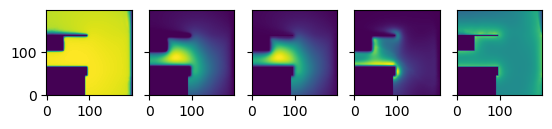

In [33]:
plot_data(cropped)